# Apple Technical Analysis Reseach
is a trading discipline employed to evaluate investments and identify trading opportunities in price trends and patterns seen on charts. Technical analysts believe past trading activity and price changes of a security can be valuable indicators of the security's future price movements

##### Disclosure: Technical should not be taken as a recommendation to buy or sell any security, this is not financial advise. This is purely perspective research only, using computational finance trading strategies for stock performances throughout different time series.  Statistical data within this case study are thoroughly researched and believed to be accurate using Yahoo Finance data package. However, discrepancies can occur with the data provided.  As an investor you should conduct your own research and recheck  for any missing data before making any final decisions regarding buying or selling any stocks. Past performances of stocks mentioned in this portfolio are not a guarantee of future performances. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
AAPL_Analysis = pd.read_csv("AAPL_Analysis.csv", index_col= "Date", parse_dates= ["Date"])

In [3]:
AAPL_Analysis.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.941502,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,24.238857,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,24.241146,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.581060,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.525522,237458000


In [4]:
AAPL_Analysis.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-02,137.589996,137.979996,127.000000,131.399994,131.399994,200119000
2020-09-03,126.910004,128.839996,120.500000,120.879997,120.879997,257599600
2020-09-04,120.070000,123.699997,110.889999,120.959999,120.959999,332607200
2020-09-08,113.949997,118.989998,112.680000,112.820000,112.820000,231366600
2020-09-09,117.260002,119.139999,115.260002,117.320000,117.320000,176276400


We will be using the close data to conduct technical analysis

In [5]:
AAPL_Analysis = AAPL_Analysis.Close.to_frame()

Using the SMA(Simple Moving Average) 50 represents 50 trading days 

In [6]:
AAPL_Analysis["SMA50"] = AAPL_Analysis.Close.rolling(window = 50).mean()

In [7]:
AAPL_Analysis.tail()

,Close,SMA50
Date,,
2020-09-02,131.399994,105.652200
2020-09-03,120.879997,106.269500
2020-09-04,120.959999,106.864500
2020-09-08,112.820000,107.352749
2020-09-09,117.320000,107.890249


Now to include the SMA 200 to represent 200 trading days for comparison to the SMA 50

In [8]:
AAPL_Analysis["SMA200"] = AAPL_Analysis.Close.rolling(window = 200).mean()

In [9]:
AAPL_Analysis.tail()

,Close,SMA50,SMA200
Date,,,
2020-09-02,131.399994,105.652200,81.605250
2020-09-03,120.879997,106.269500,81.875775
2020-09-04,120.959999,106.864500,82.147712
2020-09-08,112.820000,107.352749,82.382825
2020-09-09,117.320000,107.890249,82.641912


now to visualzie the data within the past 5 years performance of the AAPL

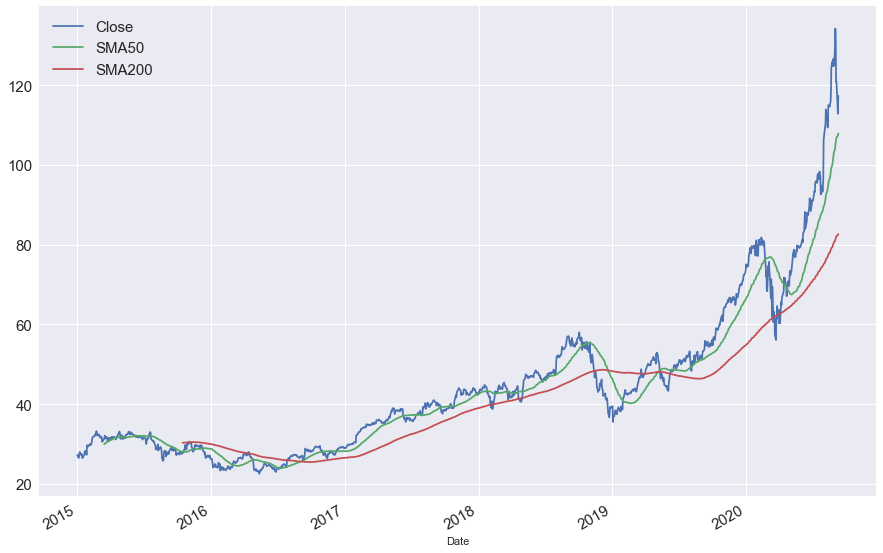

In [10]:
AAPL_Analysis.plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

SMA Trading analysis: When the SMA 50 is above the SMA 200 that is a bullish buy/hold sign. However, when the SMA 200 is above the SMA 50, that’s a bearish/sell sign with regards to trading analysis. However, value investors could use these indicators to open new long term positions. Whenever investors notice the SMA 200 is crossing above the SMA 50, that could be a sign for them to buy more shares of that long term stock, hence "buying the dip". Depending on your investment strategy long term or short term, technical analysis indications is useful for both strategies.

Finding the Return vs Risk monthly horizon of Apple

In [11]:
AAPL_Analysis_m = AAPL_Analysis.Close.resample("M", kind = "period").last().to_frame()

In [12]:
AAPL_Analysis_m.head()

,Close
Date,
2015-01,29.290001
2015-02,32.115002
2015-03,31.107500
2015-04,31.287500
2015-05,32.570000


In [13]:
AAPL_Analysis_m["Return"] = AAPL_Analysis_m.pct_change()

In [14]:
AAPL_Analysis_m.head()

,Close,Return
Date,,
2015-01,29.290001,NaN
2015-02,32.115002,0.096449
2015-03,31.107500,-0.031372
2015-04,31.287500,0.005786
2015-05,32.570000,0.040991


Return and Risk of AAPL within the past 5 years, we will be using 20 to determine how well the AAPL performned within a 20 month time frame

In [15]:
AAPL_Analysis_m["Roll_Return"] = AAPL_Analysis_m.Return.rolling(20).mean()

In [16]:
AAPL_Analysis_m.tail()

,Close,Return,Roll_Return
Date,,,
2020-05,79.485001,0.082165,0.021931
2020-06,91.199997,0.147386,0.030824
2020-07,106.260002,0.165132,0.048283
2020-08,129.039993,0.214380,0.064837
2020-09,117.320000,-0.090825,0.057538


In [17]:
AAPL_Analysis_m["Roll_Risk"] = AAPL_Analysis_m.Return.rolling(20).std()

In [18]:
AAPL_Analysis_m.tail()

,Close,Return,Roll_Return,Roll_Risk
Date,,,,
2020-05,79.485001,0.082165,0.021931,0.097548
2020-06,91.199997,0.147386,0.030824,0.100579
2020-07,106.260002,0.165132,0.048283,0.091185
2020-08,129.039993,0.214380,0.064837,0.089698
2020-09,117.320000,-0.090825,0.057538,0.096229


Annualizing the data

In [19]:
AAPL_Analysis_m["Roll_Return"] = AAPL_Analysis_m["Roll_Return"] * 12
AAPL_Analysis_m["Roll_Risk"] = AAPL_Analysis_m["Roll_Risk"] * np.sqrt(12)

In [20]:
AAPL_Analysis_m.tail()

,Close,Return,Roll_Return,Roll_Risk
Date,,,,
2020-05,79.485001,0.082165,0.263169,0.337915
2020-06,91.199997,0.147386,0.369887,0.348415
2020-07,106.260002,0.165132,0.579393,0.315875
2020-08,129.039993,0.214380,0.778040,0.310723
2020-09,117.320000,-0.090825,0.690453,0.333347


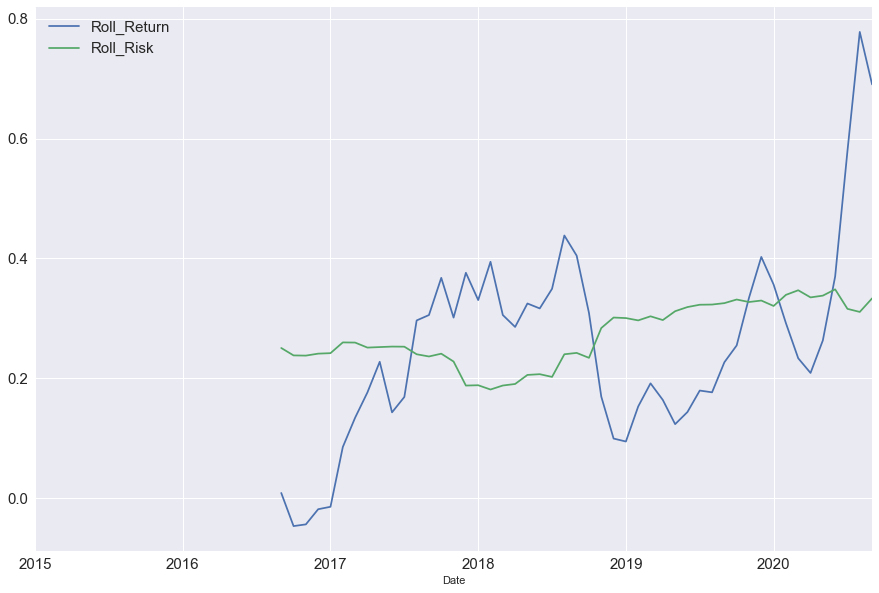

In [21]:
AAPL_Analysis_m.iloc[:,-2:].plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()